# Name: V Raghav Anand

# Register Number: 19BCE1415

# Machine Learning Lab (CSE4020)

# Faculty: Prof. Abdul Quadir MD

# LINEAR REGRESSION, MULTI-LINEAR REGRESSION AND DECISION TREE (ENTROPY, INFORMATION GAIN) WITHOUT USING SKLEARN PACKAGE

## LINEAR REGRESSION

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dataset=pd.read_csv('Salary_Data.csv')
dataset

YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0

### Checking for null values

In [3]:
dataset.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [4]:
dataset.describe()

YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

### Dependent and independent variable

In [5]:
x = dataset['YearsExperience'].values
y = dataset['Salary'].values

<AxesSubplot:>

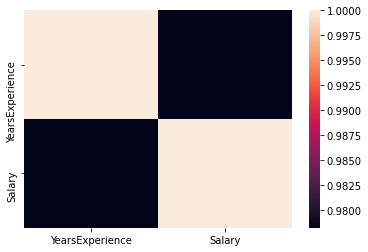

In [6]:
import seaborn as sns
sns.heatmap(dataset.corr())

### Finding the slope and intercept 

In [7]:
n = np.size(x)
meanx = np.mean(x)
meany = np.mean(y) 
SS_xy = np.sum(y*x) - n*meany*meanx  # numerator
SS_xx = np.sum(x*x) - n*meanx*meanx  # denominator
b_1 = SS_xy / SS_xx
b_0 = meany - b_1*meanx
print("Intercept",b_0)
print("Slope",b_1)

Intercept 25792.200198668717
Slope 9449.962321455072


### Plotting the regression line

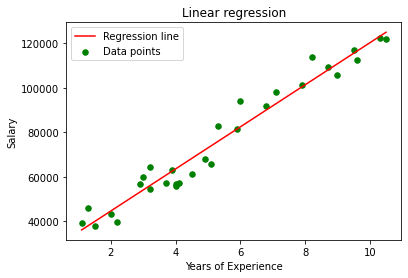

In [8]:
plt.scatter(x, y, color = "green",marker = "o", s = 30,label="Data points")
y_pred = b_0 + b_1*x
plt.plot(x, y_pred, color = "red",label="Regression line")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.title("Linear regression")
plt.show()

### R square value

In [9]:
ss_t = 0 #total sum of squares
ss_r = 0 #total sum of square of residuals
val_count=1

for i in range(int(val_count)): # val_count represents the no.of input x values
  y_pred = b_0 + b_1 * x[i]
  ss_t += (y[i] - meany) ** 2
  ss_r += (y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)

print(r2)

0.992589536454271


### Prediction of salary using years of experience

In [10]:
def prediction(x):
    y_pred = b_0 + b_1*x
    return y_pred
print("Predicted salary:",prediction(7))
print("Predicted salary:",prediction(3))

Predicted salary: 91941.93644885422
Predicted salary: 54142.08716303393


## MULTI-LINEAR REGRESSION

In [11]:
x = [[10,0,15],[0,2,5],[6,0,3],[7,4,0]]
y = [2, 7, 8, 12]

### A class whose method does all the operations of Multi-Linear regression

In [12]:
class MultipleLinearRegressionclass:
    def __init__(self):
        pass
    def __compute(self, x, y):
        self.__thetas = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
    def fit(self, x, y):
        x = np.array(x)
        ones_ = np.ones(x.shape[0])
        x = np.c_[ones_,x]
        y = np.array(y)
        self.__compute(x,y)
    @property
    def coef_(self):
        return self.__thetas[0]
    @property
    def intercept_(self):
        return self.__thetas[1:]
    def predict(self, x):
        x = np.array(x)
        ones_ = np.ones(x.shape[0])
        x = np.c_[ones_,x]
        result = np.dot(x,self.__thetas)
        return result    

### Creating an object of the class and fitting the model, finding coefficient, predicting values

In [13]:
lr = MultipleLinearRegressionclass()
lr.fit(x,y)
print("Coefficients:")
print(lr.coef_,lr.intercept_)
print("Predicted values:",lr.predict(x))
print("Actual Values:",y)

Coefficients:
8.684782608695638 [ 0.16304348  0.54347826 -0.55434783]
Predicted values: [ 2.  7.  8. 12.]
Actual Values: [2, 7, 8, 12]


## DECISION TREE

In [14]:
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]

### Dropping the unnecessary column

In [15]:
dataset=dataset.drop('User ID',axis=1)

In [16]:
eps = np.finfo(float).eps
from numpy import log2 as log
def entropy(df):
    Class = df.keys()[-1]  
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
    return entropy

### Entropy of the dataset

In [17]:
entropy(dataset)

0.9405884140193839

### Pairplot visualization

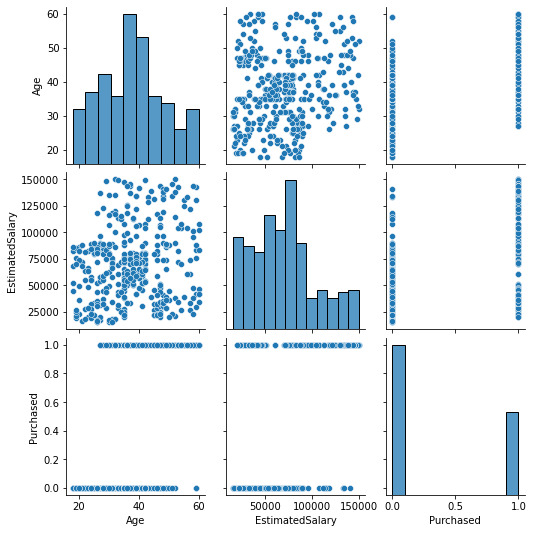

In [18]:
import seaborn as sb
sb.pairplot(dataset)

### Replacing string values with integers

In [19]:
dataset.Gender.replace(("Male","Female"),(1,2),inplace=True)
dataset

Gender  Age  EstimatedSalary  Purchased
0         1   19            19000          0
1         1   35            20000          0
2         2   26            43000          0
3         2   27            57000          0
4         1   19            76000          0
..      ...  ...              ...        ...
395       2   46            41000          1
396       1   51            23000          1
397       2   50            20000          1
398       1   36            33000          0
399       2   49            36000          1

[400 rows x 4 columns]

### Correlation heatmap

<AxesSubplot:>

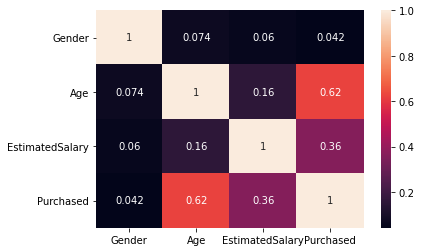

In [20]:
data_corr = dataset.corr()
sb.heatmap(data_corr,annot=True)

### Function for finding entropy of each attribute

In [21]:
def entropy_attribute(df,attribute):
  Class = df.keys()[-1]   
  target_variables = df[Class].unique()  
  variables = df[attribute].unique()    
  entropy2 = 0
  for variable in variables:
      entropy = 0
      for target_variable in target_variables:
          num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
          den = len(df[attribute][df[attribute]==variable])
          fraction = num/(den+eps)
          entropy += -fraction*log(fraction+eps)
      fraction2 = den/len(df)
      entropy2 += -fraction2*entropy
  return abs(entropy2)

### Finding entropy for each attribute in the dataset

In [22]:
attribute = 'Gender'
print(entropy_attribute(dataset,attribute))
attribute = 'Age'
print(entropy_attribute(dataset,attribute))
attribute = 'EstimatedSalary'
print(entropy_attribute(dataset,attribute))

0.9392863819595905
0.5016577374257322
0.4697585470027546


### Finding the Information Gain and the root node

In [23]:
def info_gain(df):
    Entropy_att = []
    IG = []
    for key in df.keys()[:-1]:
        IG.append(entropy(df)-entropy_attribute(df,key))
    return IG,df.keys()[:-1][np.argmax(IG)]
    return IG

In [24]:
igain,root = info_gain(dataset)
print("Information gain :",igain)
print("Root Node : ",root)

Information gain : [0.001302032059793401, 0.4389306765936517, 0.47082986701662927]
Root Node :  EstimatedSalary
